In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
d= sns.load_dataset('iris')
d.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
d['species'],categories = pd.factorize(d['species'])
d.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0


In [8]:
d.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [9]:
d.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

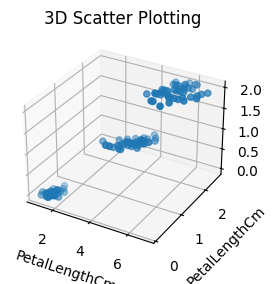

In [14]:
from mpl_toolkits.mplot3d import Axes3D
f=plt.figure() 
a=f.add_subplot(121,projection='3d')
a.scatter(d.petal_length,d.petal_width,d.species)
a.set_xlabel('PetalLengthCm')
a.set_ylabel('PetalLengthCm') 
a.set_zlabel('Species')
plt.title('3D Scatter Plotting')
plt.show()

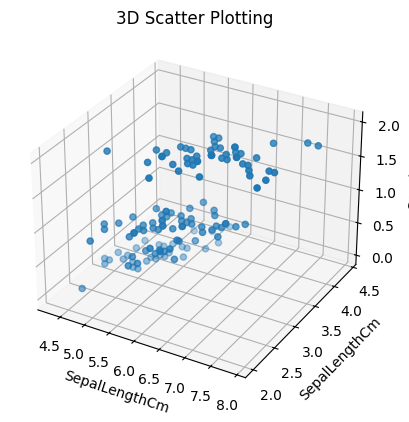

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
f=plt.figure() 
a=f.add_subplot(111,projection='3d')
a.scatter(d.sepal_length,d.sepal_width,d.species)
a.set_xlabel('SepalLengthCm')
a.set_ylabel('SepalLengthCm')
a.set_zlabel('Species')
plt.title('3D Scatter Plotting')
plt.show()

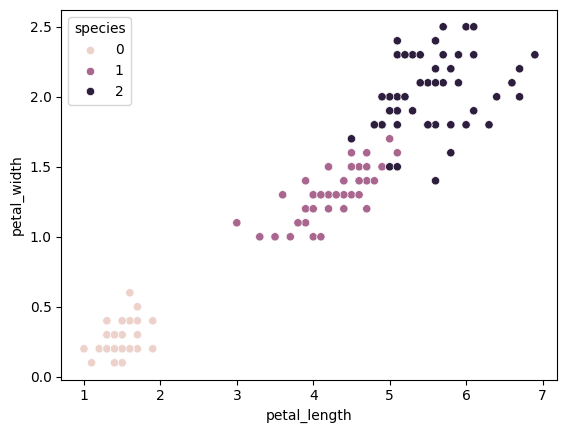

In [16]:
sns.scatterplot(data=d,x="petal_length",y="petal_width",hue="species");

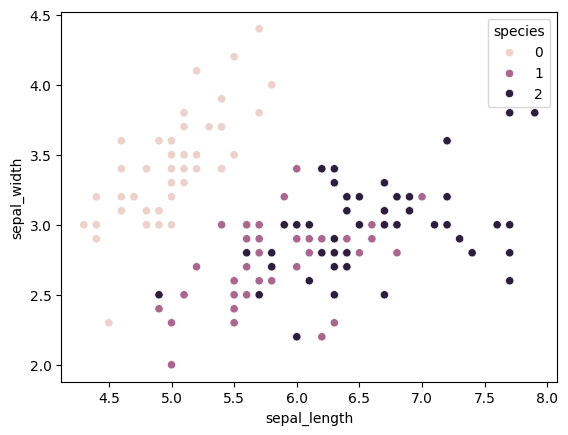

In [17]:
sns.scatterplot(data=d,x="sepal_length",y="sepal_width",hue="species");

In [18]:
k_rng=range(1,20)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(d[['petal_length','petal_width']])
    sse.append(km.inertia_)

C:\Users\chhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\chhar\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\chhar\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

In [19]:
sse

[550.8953333333333,
 86.39021984551397,
 31.371358974358973,
 19.52973359288098,
 14.06794965675057,
 11.087223662604787,
 9.470103174603178,
 7.799761904761907,
 7.3744359762471205,
 6.109312001723766,
 5.325115513141828,
 5.320774891774891,
 4.547620745267802,
 4.271848633392749,
 3.726439532689532,
 3.849232883749111,
 3.478597402597403,
 3.141523795648795,
 2.8757948825368183]

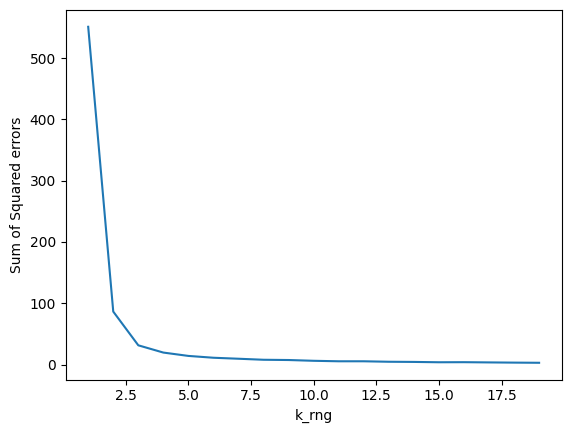

In [21]:
plt.xlabel('k_rng')
plt.ylabel("Sum of Squared errors")
plt.plot(k_rng,sse)

In [24]:
km=KMeans(n_clusters=5,random_state=0,)
y_predicted = km.fit_predict(d[['sepal_length','sepal_width']])

In [25]:
d['cluster']=y_predicted
d.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,0
96,5.7,2.9,4.2,1.3,1,0
97,6.2,2.9,4.3,1.3,1,1
98,5.1,2.5,3.0,1.1,1,0


In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(d.species,d.cluster)
cm


array([[ 1,  0, 49,  0,  0],
       [25, 17,  0,  8,  0],
       [ 7, 17,  0, 15, 11],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

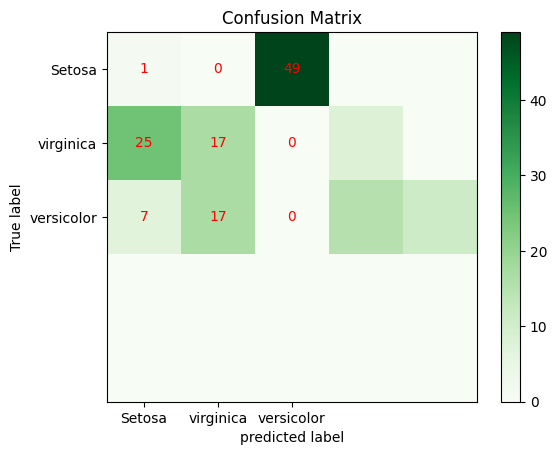

In [28]:
true_labels=d.species
predicated_labels=d.cluster
cm=confusion_matrix(true_labels,predicated_labels)
class_labels =['Setosa','virginica','versicolor']
#plot confusion matrix
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks=np.arange(len(class_labels))
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
#fill matrix with values
for i in range (len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j,i,str(cm[i][j]),ha='center',va='center',color='red')
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()
